In [1]:
from typing import List, Dict, Any
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import missingno as mns
import os
import warnings


os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../models/image/image1"
DATA_PATH = '../data/data/'
RESULT_PATH = '../data/summary/'
MODEL_PATH = '../models/model1/'

np.random.seed(42)

In [2]:
transform = pd.read_csv(RESULT_PATH + 'transform.csv')
transform

,1_1,1_10,1_11,1_12,1_13,1_14,1_15,1_16,1_17,1_18,...,8_28,8_29,8_3,8_30,8_4,8_5,8_6,8_7,8_8,8_9
0,0.012602,0.011450,-0.176203,-0.036674,-0.026947,0.014838,0.006234,-0.530086,-1.707829,-0.679290,...,0.003356,0.000226,0.000074,-0.006010,0.009478,-0.067317,-0.008951,-0.018505,0.008764,0.016276
1,-0.003336,-0.016240,-0.024282,-0.035311,0.114516,-0.193881,-0.060875,-0.607624,-2.431200,-0.504764,...,0.004541,0.000528,0.000702,-0.005237,0.011004,-0.066072,-0.014454,-0.017302,0.004975,0.006080
2,-0.006454,0.001249,0.029096,0.016480,0.029189,0.091976,-0.045963,-0.350338,-2.307193,-0.472616,...,0.005349,0.001057,0.001358,-0.004730,0.012247,-0.062780,-0.018934,-0.014487,0.002274,-0.003967
3,0.008098,-0.080366,-0.020176,0.026020,-0.058387,0.046606,0.100686,0.051451,-1.363366,-0.500171,...,0.005704,0.001737,0.001979,-0.004410,0.013146,-0.057815,-0.022116,-0.010262,0.000694,-0.013040
4,-0.006628,-0.068707,-0.106401,-0.027133,-0.069611,-0.021457,-0.055905,0.492009,-0.639995,-0.247568,...,0.005569,0.002484,0.002494,-0.004134,0.013659,-0.051635,-0.023826,-0.004969,0.000092,-0.020482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.086638,-0.542362,0.915988,0.225004,-0.002247,0.164577,0.001263,0.640037,0.455395,-0.614988,...,-0.002688,0.012859,-0.002563,0.029693,0.009401,-0.025864,-0.027323,0.025959,0.001592,0.013016
7996,-1.255552,-0.406824,0.842080,0.373561,-0.119010,0.028449,0.016179,0.569547,0.414059,-0.672401,...,-0.002361,0.014742,-0.001448,0.026582,0.011079,-0.031046,-0.042437,0.022254,0.008665,0.008778
7997,-1.061691,-0.351442,0.427376,0.447158,-0.089820,0.255325,0.128029,0.280541,0.248717,-0.612691,...,-0.002058,0.016352,-0.000192,0.023567,0.012684,-0.034179,-0.056179,0.019695,0.015104,0.004747
7998,-1.086465,-0.250882,0.004460,0.526206,-0.110029,0.046606,0.128029,0.079647,0.538066,-0.727514,...,-0.001722,0.017584,0.001223,0.020678,0.014185,-0.034970,-0.067295,0.018402,0.020689,0.001015


In [3]:
import pickle

def read_bins(path: str, res=True) -> Any:
    if res:
        f = open(RESULT_PATH + path, 'rb')
    else:
        f = open(path, 'rb')
    s = f.read()
    return pickle.loads(s)

def write_bins(model: Any, path: str, res=True) -> Any:
    path = RESULT_PATH + path if res else path
    m = pickle.dumps(model)
    with open(path, 'wb+') as f:
        f.write(m)

In [4]:
earth = read_bins('earth.list')
shed = read_bins('unnatural.list')

In [5]:
train = pd.DataFrame()

for i in earth:
    train = pd.concat([train, i.T.iloc[:10]])
for i in shed:
    train = pd.concat([train, i.T.iloc[:20]])
train

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
1_1,0.031847,-0.011189,-0.019609,0.019685,-0.020076,-0.000898,-0.001365,-0.006043,-0.005108,0.001909,...,0.883669,0.428054,-0.079484,0.102949,-0.804071,-2.936200,-3.392283,-2.868840,-2.935732,-2.460470
1_10,0.001247,-0.007641,-0.002028,-0.028223,-0.024481,0.002182,-0.013254,-0.001092,0.007796,-0.017464,...,-0.221415,-0.206446,-0.214398,-0.183993,-0.189138,-0.176508,-0.133005,-0.115230,-0.082953,-0.043660
1_11,-0.018077,-0.000769,0.005312,-0.000301,-0.010124,-0.010592,0.002973,0.005312,-0.005914,-0.019948,...,0.076414,0.053493,0.038057,0.067059,0.085770,0.106352,0.097932,0.050687,0.002506,-0.037723
1_12,-0.015064,-0.014596,0.003179,0.006454,-0.011789,0.012067,-0.001498,-0.007579,-0.005708,-0.014596,...,-0.200771,-0.134347,-0.079617,-0.021145,0.021423,0.074749,0.125737,0.150997,0.178128,0.199178
1_13,-0.004527,0.024943,0.007167,-0.011077,-0.013415,0.017458,0.020733,0.001554,-0.004995,0.026346,...,0.053945,0.042718,0.013716,-0.006398,0.018394,0.000618,-0.023706,-0.017625,-0.021835,-0.012479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_23,-18.703373,-24.892555,-28.146841,-28.462965,-26.189087,-21.945822,-16.497658,-10.621331,-4.996841,-0.139291,...,-19.474800,-21.291332,-22.178679,-22.506433,-22.501944,-22.248474,-21.719902,-20.843985,-19.569902,-17.927658
8_24,6.533483,-0.396517,-7.194654,-13.267302,-18.153183,-21.557693,-23.357693,-23.578184,-22.349949,-19.867302,...,-16.344751,-13.355243,-9.812792,-5.895536,-1.810831,2.227601,6.016424,9.369366,12.115640,14.100052
8_25,20.799034,5.738626,-9.456475,-23.552597,-35.564842,-44.826271,-50.997498,-54.019127,-54.031170,-51.295456,...,42.800259,46.561687,49.846790,52.468014,54.245770,55.010464,54.616383,52.959850,49.998829,45.767811
8_26,-53.410206,-61.589596,-69.321838,-75.982040,-81.187347,-84.861229,-87.241020,-88.820816,-90.248573,-92.205917,...,-93.262451,-96.471428,-91.967552,-80.409592,-62.989391,-41.308983,-17.208982,7.429181,30.841425,51.489384


In [6]:
test = pd.DataFrame()

for i in earth:
    test = pd.concat([test, i.T.iloc[10:]])
for i in shed:
    test = pd.concat([test, i.T.iloc[20:]])
test

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
1_19,0.004865,-0.017121,-0.003555,0.002058,-0.003555,0.004397,-0.011975,-0.005894,-0.004023,-0.009168,...,-1.050441,-0.923205,-0.857249,-0.807196,-0.638797,-0.333806,0.034803,0.402943,0.706531,1.001698
1_2,0.016663,-0.002048,-0.007661,0.007308,0.001226,0.018534,0.000759,0.008711,0.008711,0.001226,...,1.411575,0.802061,-0.713537,-1.159329,-0.163431,1.122488,2.000974,1.194994,-0.888954,-1.931161
1_20,0.000327,0.009683,-0.002947,-0.000140,0.006876,0.003134,0.002666,0.001731,-0.002011,0.006409,...,-0.028207,-0.068436,-0.097906,-0.070775,-0.042240,-0.064694,-0.048321,-0.022594,-0.016513,0.008747
1_3,0.020103,0.006537,-0.002818,-0.002351,-0.020594,0.000456,0.007005,0.011215,-0.007964,0.008876,...,0.410229,0.595001,-0.218464,-1.535257,-0.487903,1.303684,0.883152,0.248846,-0.528132,-1.347678
1_4,0.005837,0.023145,0.003030,-0.019423,0.016596,-0.004454,0.005369,0.013789,-0.017084,-0.004454,...,0.389414,0.197626,0.044195,-0.141981,-0.280910,-0.291669,-0.199985,0.020338,0.284164,0.463791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_5,-56.581928,-55.657642,-53.212746,-49.525192,-44.935604,-39.779888,-34.345398,-28.861521,-23.513969,-18.462746,...,6.644194,-0.747235,-7.911929,-14.644786,-20.699072,-25.795603,-29.644175,-31.971317,-32.558460,-31.282133
8_6,-19.432631,-28.327196,-35.569153,-40.711327,-43.475456,-43.747631,-41.566544,-37.108936,-30.667849,-22.635021,...,34.883457,28.192152,15.495848,-2.578500,-24.737413,-49.127632,-73.555237,-95.766106,-113.732628,-125.915459
8_7,-33.967102,-32.017540,-27.452972,-20.603409,-12.023408,-2.387321,7.625940,17.436592,26.651592,35.110722,...,76.403763,70.120720,62.356373,53.907246,45.582462,38.119202,32.112026,27.962679,25.867680,25.843983
8_8,16.815691,10.192864,5.472429,2.710255,1.658299,1.842864,2.688516,3.643951,4.276560,4.325038,...,-55.594746,-46.241917,-34.735180,-21.981701,-8.764092,4.280690,16.642647,27.897211,37.658298,45.543083


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [8]:
def metrics_score(y_true, y_pred):
    return [
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        accuracy_score(y_true, y_pred)
    ]

In [9]:
for model in [DecisionTreeClassifier(random_state=42), GradientBoostingClassifier(random_state=42),
              RandomForestClassifier(random_state=42), SVC(random_state=42)]:
    %timeit model.fit(train, [0] * 70 + [1] * 20)
    pre = model.predict(test)
    print(str(model.__class__) + ': ' + str(metrics_score([0] * 70 + [1] * 10, pre)))


270 ms ± 75.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
<class 'sklearn.tree._classes.DecisionTreeClassifier'>: [1.0, 0.8, 0.888888888888889, 0.975]
14.6 s ± 1.42 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>: [1.0, 0.7, 0.8235294117647058, 0.9625]
185 ms ± 8.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>: [1.0, 1.0, 1.0, 1.0]
47 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
<class 'sklearn.svm._classes.SVC'>: [1.0, 0.9, 0.9473684210526316, 0.9875]


In [10]:
from sklearn.decomposition import PCA

pca = PCA(.99)
p_train = pca.fit_transform(train)
p_test = pca.transform(test)

In [11]:
for model in [DecisionTreeClassifier(random_state=42), GradientBoostingClassifier(random_state=42),
              RandomForestClassifier(random_state=42), SVC(random_state=42)]:
    %timeit model.fit(p_train, [0] * 70 + [1] * 20)
    pre = model.predict(p_test)
    print(str(model.__class__) + ': ' + str(metrics_score([0] * 70 + [1] * 10, pre)))

564 µs ± 112 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
<class 'sklearn.tree._classes.DecisionTreeClassifier'>: [1.0, 0.9, 0.9473684210526316, 0.9875]
41.9 ms ± 552 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>: [1.0, 0.6, 0.7499999999999999, 0.95]
85.7 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>: [1.0, 1.0, 1.0, 1.0]
421 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
<class 'sklearn.svm._classes.SVC'>: [1.0, 0.9, 0.9473684210526316, 0.9875]


In [13]:
from keras.layers import *
from keras.models import Sequential
from tcn import TCN
from keras.metrics import *

model = Sequential()
model.add(Conv1D(32, 31, activation='relu', input_shape=(8000, 1)))
model.add(Dropout(.3))
model.add(Conv1D(32, 31, activation='relu'))
model.add(Dropout(.3))
model.add(Conv1D(32, 31, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 31, activation='relu'))
model.add(Dropout(.3))
model.add(Conv1D(32, 31, activation='relu'))
model.add(Dropout(.3))
model.add(Conv1D(32, 31, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
hist = model.fit(train.to_numpy().reshape(-1, 8000, 1), np.array([0] * 70 + [1] * 20).reshape(-1, 1), epochs=32)

Epoch 1/32
3/3 [==============================] - 7s 2s/step - loss: 1.3363 - accuracy: 0.6556 - precision_1: 0.3878 - recall_1: 0.9500
Epoch 2/32
3/3 [==============================] - 4s 1s/step - loss: 0.1133 - accuracy: 0.9556 - precision_1: 0.8333 - recall_1: 1.0000
Epoch 3/32
3/3 [==============================] - 4s 1s/step - loss: 0.0592 - accuracy: 0.9889 - precision_1: 0.9524 - recall_1: 1.0000
Epoch 4/32
3/3 [==============================] - 4s 1s/step - loss: 0.0194 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 5/32
3/3 [==============================] - 4s 1s/step - loss: 0.0038 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 6/32
3/3 [==============================] - 4s 1s/step - loss: 0.0012 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 7/32
3/3 [==============================] - 4s 1s/step - loss: 4.6980e-04 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000
Epoch 8/32
3/3 [============================

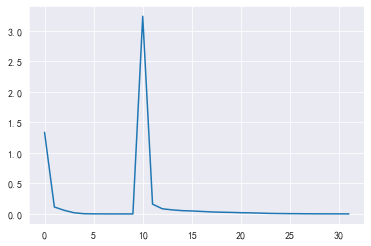

In [14]:
plt.plot(hist.history['loss'])

In [15]:
pre = model.predict(test)[:, 0]
metrics_score([0] * 70 + [1] * 10, np.round(pre))

3/3 [==============================] - 0s 108ms/step


[1.0, 1.0, 1.0, 1.0]

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

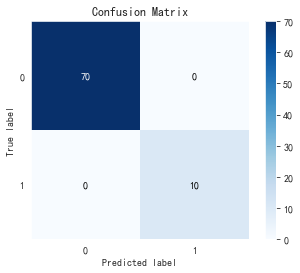

In [16]:
from scikitplot import *

metrics.plot_confusion_matrix([0] * 70 + [1] * 10, np.round(pre))

In [17]:
pd.concat([train, test])

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
1_1,0.031847,-0.011189,-0.019609,0.019685,-0.020076,-0.000898,-0.001365,-0.006043,-0.005108,0.001909,...,0.883669,0.428054,-0.079484,0.102949,-0.804071,-2.936200,-3.392283,-2.868840,-2.935732,-2.460470
1_10,0.001247,-0.007641,-0.002028,-0.028223,-0.024481,0.002182,-0.013254,-0.001092,0.007796,-0.017464,...,-0.221415,-0.206446,-0.214398,-0.183993,-0.189138,-0.176508,-0.133005,-0.115230,-0.082953,-0.043660
1_11,-0.018077,-0.000769,0.005312,-0.000301,-0.010124,-0.010592,0.002973,0.005312,-0.005914,-0.019948,...,0.076414,0.053493,0.038057,0.067059,0.085770,0.106352,0.097932,0.050687,0.002506,-0.037723
1_12,-0.015064,-0.014596,0.003179,0.006454,-0.011789,0.012067,-0.001498,-0.007579,-0.005708,-0.014596,...,-0.200771,-0.134347,-0.079617,-0.021145,0.021423,0.074749,0.125737,0.150997,0.178128,0.199178
1_13,-0.004527,0.024943,0.007167,-0.011077,-0.013415,0.017458,0.020733,0.001554,-0.004995,0.026346,...,0.053945,0.042718,0.013716,-0.006398,0.018394,0.000618,-0.023706,-0.017625,-0.021835,-0.012479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_5,-56.581928,-55.657642,-53.212746,-49.525192,-44.935604,-39.779888,-34.345398,-28.861521,-23.513969,-18.462746,...,6.644194,-0.747235,-7.911929,-14.644786,-20.699072,-25.795603,-29.644175,-31.971317,-32.558460,-31.282133
8_6,-19.432631,-28.327196,-35.569153,-40.711327,-43.475456,-43.747631,-41.566544,-37.108936,-30.667849,-22.635021,...,34.883457,28.192152,15.495848,-2.578500,-24.737413,-49.127632,-73.555237,-95.766106,-113.732628,-125.915459
8_7,-33.967102,-32.017540,-27.452972,-20.603409,-12.023408,-2.387321,7.625940,17.436592,26.651592,35.110722,...,76.403763,70.120720,62.356373,53.907246,45.582462,38.119202,32.112026,27.962679,25.867680,25.843983
8_8,16.815691,10.192864,5.472429,2.710255,1.658299,1.842864,2.688516,3.643951,4.276560,4.325038,...,-55.594746,-46.241917,-34.735180,-21.981701,-8.764092,4.280690,16.642647,27.897211,37.658298,45.543083


In [20]:
rf = RandomForestClassifier(random_state=42)
rf.fit(pca.transform(pd.concat([train, test])), [0] * 70 + [1] * 20 + [0] * 70 + [1] * 10)
proba = rf.predict_proba(pca.transform(pd.concat([train, test])), )
proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  ,

In [21]:
rf.feature_importances_

array([0.05796225, 0.01832271, 0.0473746 , 0.12397487, 0.04696468,
       0.04987433, 0.12500623, 0.03113295, 0.05116806, 0.15117179,
       0.0784284 , 0.0355981 , 0.05759811, 0.04443241, 0.04211371,
       0.02002009, 0.01885673])

In [22]:
pca.transform(pd.concat([train, test]))

array([[ -4465.509  ,    497.18585,   -356.95532, ...,   -606.6225 ,
           207.3414 ,  -1032.1714 ],
       [ -4465.4653 ,    497.1189 ,   -356.8735 , ...,   -606.3855 ,
           208.13332,  -1032.5629 ],
       [ -4465.5527 ,    497.06113,   -356.8011 , ...,   -606.1006 ,
           208.02843,  -1032.4032 ],
       ...,
       [-52888.305  ,  42243.137  ,  49385.836  , ...,  -9422.124  ,
         -9002.82   ,  -7775.862  ],
       [-19416.488  , -63245.86   , -49537.777  , ...,    241.39972,
          4132.109  ,   -176.80858],
       [-14277.77   , -32006.13   ,   4917.073  , ...,  10931.992  ,
         21978.457  ,  -2526.786  ]], dtype=float32)